In [21]:
import torch
import requests
import matplotlib.pyplot as plt

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)

vectors = []
answers = []
with open('iris.data', 'r') as f:
  for line in f:
    line = line.strip()
    if len(line) != 0:
      items = line.split(",")
      vectors.append([float(x) for x in items[:4]])
      answers.append(items[4])

species = {a: i for i, a in enumerate(set(answers))}

X = torch.FloatTensor(vectors)
Z = (X-torch.mean(X, axis=0))



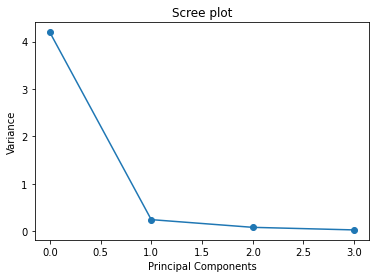

In [22]:
def findPC(Z):
  w = torch.randn(Z.shape[1])
  w = w/(torch.dot(w,w))**0.5

  lr = 0.1
  for epoch in range(1001):
    w.requires_grad_(True)
    variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)

    variance.backward()
    with torch.no_grad():
      w = w + lr * w.grad
      w = w/(torch.dot(w,w))**0.5
  return w, variance.item()

def PCA(Z, n):
  W, V = [], []
  for _ in range(n):
    w, v = findPC(Z)
    W.append(w.tolist())
    V.append(v)
    Z = Z - (Z * w).sum(axis=1).view(-1,1) * w
  return W, V  

def transform(Z, W):
  return torch.mm( Z, torch.Tensor(W).T)

W, V = PCA(Z, 4)
K = transform(Z, W)

plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()


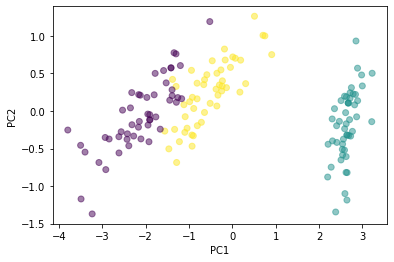

In [23]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.show()